In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:35<00:00, 24.5MB/s]
100% 715M/715M [00:35<00:00, 21.4MB/s]


In [7]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [10]:
!pip install py7zr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.4/390.4 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 42.2 MB/s eta 0:00:00


In [12]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()


In [13]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [14]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [15]:
filenames = os.listdir('/content/train')

In [17]:
len(filenames)

50000

In [18]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [21]:
labels_df[labels_df['id']==6009]

,id,label
6008,6009,airplane


In [22]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


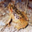

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

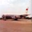

In [26]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/6009.png')
cv2_imshow(img)

In [28]:
labels_df[labels_df['id'] == 6009]

,id,label
6008,6009,airplane


In [29]:
id_list = list(labels_df['id'])

In [30]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
data[6009]

array([[[ 49,  52,  55],
        [ 51,  52,  55],
        [ 53,  51,  54],
        ...,
        [ 51,  51,  51],
        [ 52,  52,  52],
        [ 51,  51,  51]],

       [[ 49,  52,  48],
        [ 48,  50,  47],
        [ 49,  49,  47],
        ...,
        [ 50,  49,  47],
        [ 52,  52,  52],
        [ 50,  50,  50]],

       [[ 49,  52,  42],
        [ 49,  53,  47],
        [ 56,  64,  61],
        ...,
        [ 49,  50,  47],
        [ 52,  51,  52],
        [ 50,  50,  50]],

       ...,

       [[ 51,  48,  45],
        [ 77,  71,  59],
        [117, 110,  86],
        ...,
        [ 52,  51,  52],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 50,  49,  46],
        [ 68,  66,  56],
        [102,  99,  80],
        ...,
        [ 51,  51,  51],
        [ 50,  51,  51],
        [ 51,  51,  51]],

       [[ 50,  50,  47],
        [ 53,  52,  48],
        [ 64,  61,  55],
        ...,
        [ 52,  51,  51],
        [ 52,  52,  52],
        [ 51,  51,  51]]

In [33]:
X=np.array(data)
Y=np.array(labels)

In [40]:
Y

array([6, 9, 9, ..., 9, 1, 1])

In [35]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [38]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [39]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [43]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 4ms/step - loss: 1.9940 - acc: 0.2695 - val_loss: 1.8593 - val_acc: 0.3162
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8708 - acc: 0.3177 - val_loss: 1.8339 - val_acc: 0.3248
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8434 - acc: 0.3297 - val_loss: 1.8479 - val_acc: 0.3100
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8242 - acc: 0.3362 - val_loss: 1.7935 - val_acc: 0.3503
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8128 - acc: 0.3414 - val_loss: 1.8369 - val_acc: 0.3358
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7993 - acc: 0.3447 - val_loss: 1.7956 - val_acc: 0.3438
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7940 - acc: 0.3467 - val_loss: 1.8058 - val_acc: 0.3343
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [49]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [50]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [51]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [52]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [53]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 472s 385ms/step - loss: 2.1172 - acc: 0.2433 - val_loss: 2.0823 - val_acc: 0.2558
Epoch 2/10
1125/1125 [==============================] - 440s 391ms/step - loss: 1.5298 - acc: 0.4402 - val_loss: 1.5061 - val_acc: 0.5082
Epoch 3/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.2669 - acc: 0.5511 - val_loss: 1.1714 - val_acc: 0.5825
Epoch 4/10
1125/1125 [==============================] - 441s 392ms/step - loss: 1.1083 - acc: 0.6159 - val_loss: 0.8931 - val_acc: 0.6890
Epoch 5/10
1125/1125 [==============================] - 434s 385ms/step - loss: 0.9921 - acc: 0.6641 - val_loss: 1.0102 - val_acc: 0.6438
Epoch 6/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.9080 - acc: 0.6962 - val_loss: 0.8238 - val_acc: 0.7200
Epoch 7/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.8248 - acc: 0.7292 - val_loss: 1.4196 - val_acc: 0.7170
Epoch 8/10
1125/1125 [============

In [54]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 37s 111ms/step - loss: 0.7203 - acc: 0.7675
Test Accuracy = 0.7674999833106995


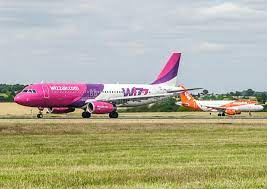

In [60]:
file='download (5).png'
img_69 = cv2.imread('/content/download (5).png')
cv2_imshow(img_69)

In [62]:
img_69.shape

(189, 267, 3)

In [70]:
new_image_32=cv2.resize(img_69,(32,32))
new_image_32_69=new_image_32/255
new_image_32_69

array([[[0.83529412, 0.81176471, 0.79215686],
        [0.82745098, 0.80392157, 0.78431373],
        [0.82352941, 0.8       , 0.77254902],
        ...,
        [0.83921569, 0.80784314, 0.78039216],
        [0.81568627, 0.78431373, 0.75686275],
        [0.82352941, 0.79215686, 0.76470588]],

       [[0.85490196, 0.81960784, 0.78431373],
        [0.85098039, 0.81568627, 0.78039216],
        [0.83137255, 0.79607843, 0.76078431],
        ...,
        [0.90196078, 0.89411765, 0.85882353],
        [0.82745098, 0.81568627, 0.78431373],
        [0.81960784, 0.78823529, 0.76078431]],

       [[0.82352941, 0.77647059, 0.72941176],
        [0.81960784, 0.77254902, 0.7254902 ],
        [0.80392157, 0.76078431, 0.70588235],
        ...,
        [0.83529412, 0.83529412, 0.80392157],
        [0.83921569, 0.83921569, 0.80784314],
        [0.86666667, 0.83529412, 0.80784314]],

       ...,

       [[0.31372549, 0.67058824, 0.64313725],
        [0.41568627, 0.76862745, 0.74509804],
        [0.29803922, 0

In [71]:
model.predict(new_image_32_69)

ValueError: ignored